In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Tesla Stock Data from 2010-06-29 to 2020-02-03
### Stock Data includes Open, High, Low, Close, Adj Close and Volume 
In stock trading, the high and low refer to the maximum and minimum prices in a given time period. Open and close are the prices at which a stock began and ended trading in the same period. Volume is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

Valuable information can be gleaned from understanding the open, high, low, close of a stock, and as well as it’s trading volume. Traders often visualize price actions through bars and bar charts.

In [2]:
tesla=pd.read_csv("../input/tesla-stock-data-from-2010-to-2020/TSLA.csv",index_col="Date",parse_dates=True)

In [3]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Meta data for the data

In [4]:
print(f"the rows and columns in the dataset:{tesla.shape}")
print(f"the column headers in the dataset: {tesla.columns}")

the rows and columns in the dataset:(2416, 6)
the column headers in the dataset: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [5]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


In [6]:
tesla.axes

[DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
                '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
                '2010-07-12', '2010-07-13',
                ...
                '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
                '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
                '2020-01-31', '2020-02-03'],
               dtype='datetime64[ns]', name='Date', length=2416, freq=None),
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')]

In [7]:
tesla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'The General Trend of all values')

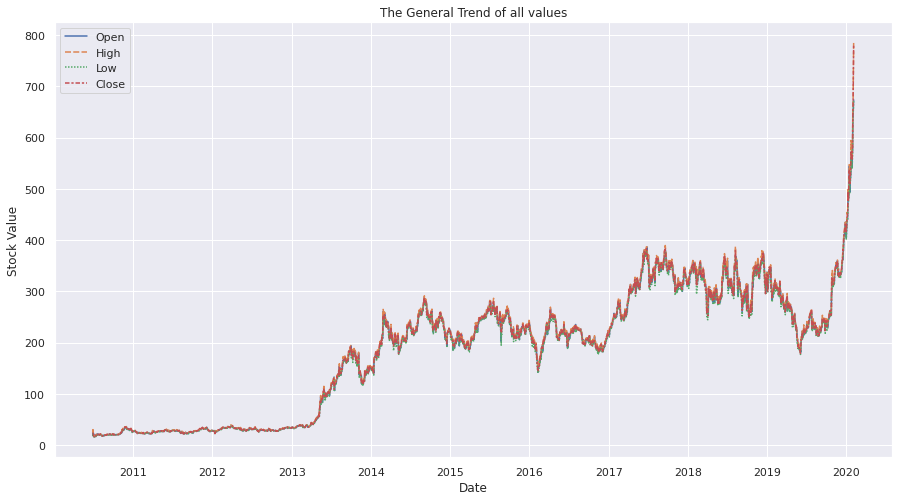

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(data=tesla.iloc[:,:-2])
plt.ylabel("Stock Value")
plt.title("The General Trend of all values")

<AxesSubplot:>

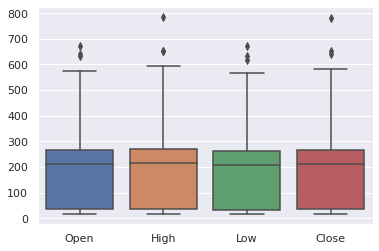

In [9]:
sns.boxplot(data=tesla.iloc[:,:-2])

In [22]:
def get_sales_from_date(date1="2011-01-01",date2="2017-01-01",window=50):
    """This returns the stock records from one date to another, inputs are in form of datetime objects
    for example: get_sales_from_date("2017-01-01","2018-01-01"), giving the moving average to identify the general trend"""
    return(tesla.loc[f"{date1}":f"{date2}"].rolling(window).mean())

In [11]:
def visualize_from_dates(df):
    """This returns the stock records from one date to another, using the function and gives out the adjuseted close)"""
    return(plt.figure(figsize=(15,8)),
           sns.lineplot(data=df.iloc[:,4:5]))

Text(0.5, 1.0, 'The critical time for Adjusted Close from 2014 to 2015')

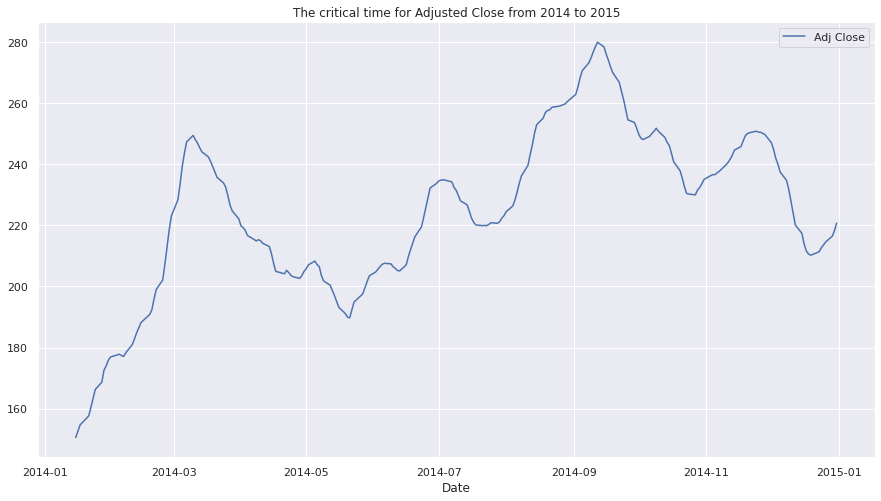

In [24]:
# 10 day moving average
visualize_from_dates(get_sales_from_date("2014-01-01","2015-01-01",10))
plt.title("The critical time for Adjusted Close from 2014 to 2015")

### We can celarly see that during the pandemic and the year from 2019 - 2020 was a huge leap for tesla stocks

Text(0.5, 1.0, 'Themost important time Adjusted Close from 2014 to 2015')

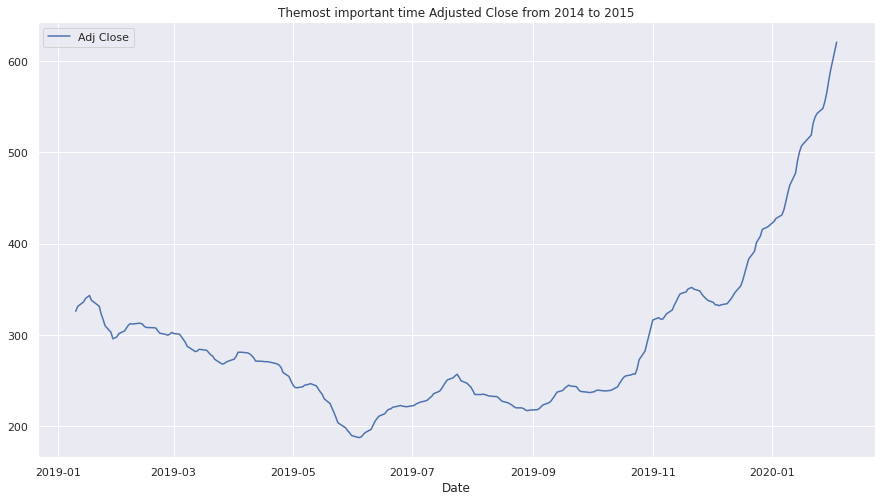

In [27]:
visualize_from_dates(get_sales_from_date("2019-01-01","2021-10-01",7))
plt.title("Themost important time Adjusted Close from 2014 to 2015")

<AxesSubplot:>

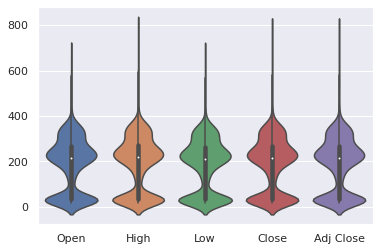

In [14]:
sns.violinplot(data=tesla.iloc[:,:-1])

<AxesSubplot:xlabel='Date'>

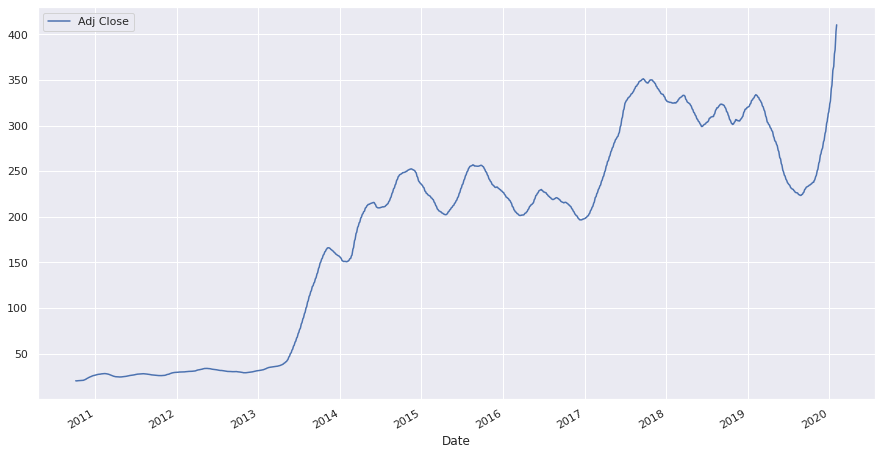

In [45]:
import plotly.express as px

df =tesla.iloc[:,4:5].rolling(70).mean()
fig = px.line(df, x=df.index, y="Adj Close")
fig.show()

### By using this plotly interactive graph we can see the trend
The major tuning points were


In [60]:
data=tesla.iloc[:,4:5].copy()

In [88]:
data["Relative"]=data["Adj Close"].pct_change(periods=10)

In [89]:
data[data["Relative"]>0.2]

,Adj Close,Relative
Date,,
2010-07-20,20.299999,0.260087
2010-07-21,20.219999,0.279747
2010-07-22,21.000000,0.202749
2010-07-23,21.290001,0.223563
2010-07-26,20.950001,0.228739
...,...,...
2020-01-21,547.200012,0.211853
2020-01-22,569.559998,0.214258
2020-01-30,640.809998,0.235892
